# TP SVM Bachelor 3

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importer les données
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
# afficher la description de la base de données
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# iris.feature_names[]
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# SVM à noyau linéaire

Nous allons nous limiter pour l'instant à deux classes : setosa et virginica, et à deux features (pour visualiser) : sepal length and sepal width. Nous allons entrainer une SVM linéaire et afficher l'hyperplan séparateur (en 2D une droite donc).

Nous allons utiliser la classe [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) du module svm de scikit-learn.

In [20]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1000)

# on sélectionne les données voulues (2 classes et 2 features)
X = iris.data[iris.target !=1, :2]
print(X.shape)
y = iris.target[iris.target !=1]
print(y.shape)
clf.fit(X, y)

(100, 2)
(100,)


SVC(C=1000, kernel='linear')

### Représentons l'hyperplan séparateur !

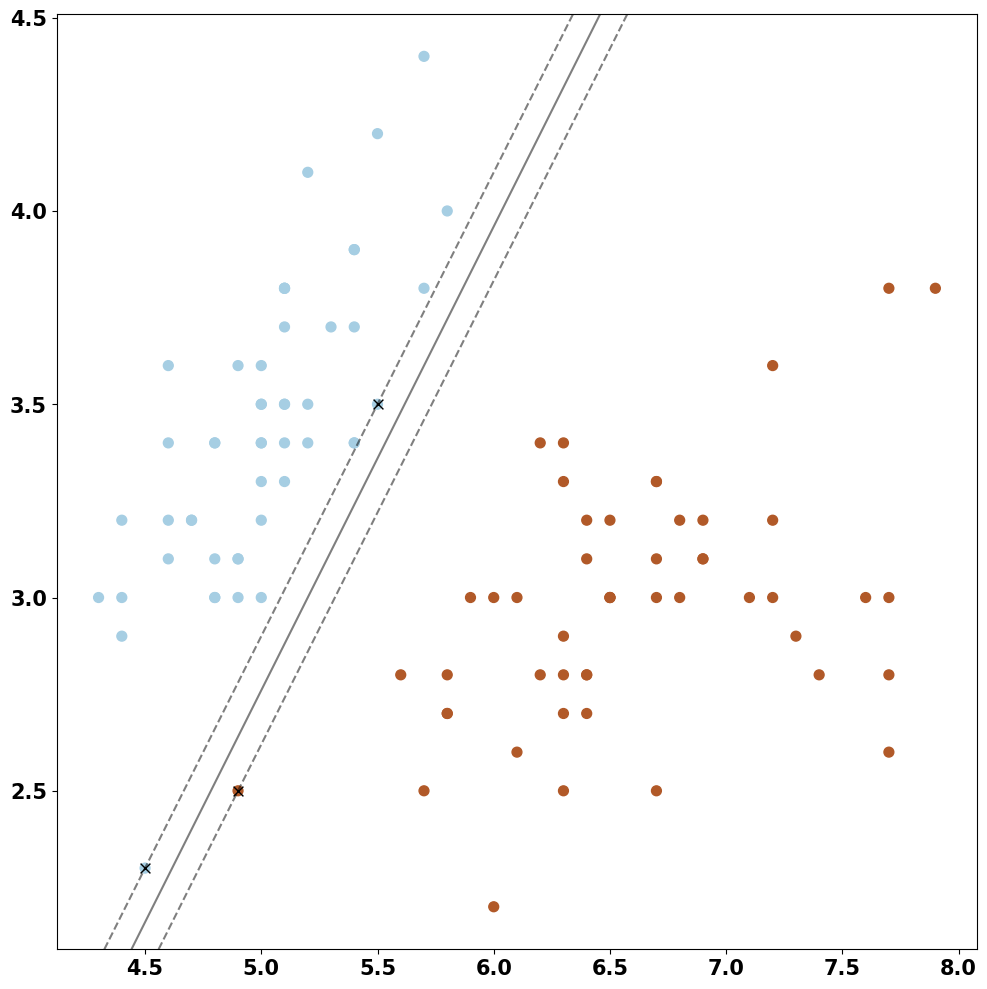

In [21]:
plt.figure(figsize=(10, 10))

# plot the point cloud
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

# get frame limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# visualize support vectors with a cross
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
           s=50, linewidth=1, marker='x', color='k')

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
           alpha=0.5, linestyles=['--', '-', '--'])

# format the plot
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

### __Question :__ Où sont situés les vecteurs de support ?

__Réponse :__ ###

Les vecteurs de support sont situés de part et d'autre du séparateur

#### Affichons la performance du prédicteur avec la methode score() et classification_report

In [27]:
from sklearn.metrics import classification_report
performance_predicteur = clf.score(X,y)
print("Performance du predicteur : ", performance_predicteur)
report = classification_report(y, clf.predict(X))
print(report)

Performance du predicteur :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



__Question :__ Quelle mesure de performance est calculée par `clf.score` ? Référez-vous à la [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score). Que veut dire une performance de 1.0 ?

__Réponse :__ ###

Il retourne l'accuracy moyenne sur le dataset. Si celle-ci est égale à 1, cela veut dire que le dataset est linéairement séparable

Considérons maintenant les deux classes Versicolour et Virginica !

In [35]:
clf = svm.SVC(kernel='poly', C=1000)
# on sélectionne les données voulues (2 classes et 2 features)
X = iris.data[iris.target !=1, :2]
print(X.shape)
y = iris.target[iris.target !=1]
print(y.shape)
clf.fit(X, y)

(100, 2)
(100,)


SVC(C=1000, kernel='poly')

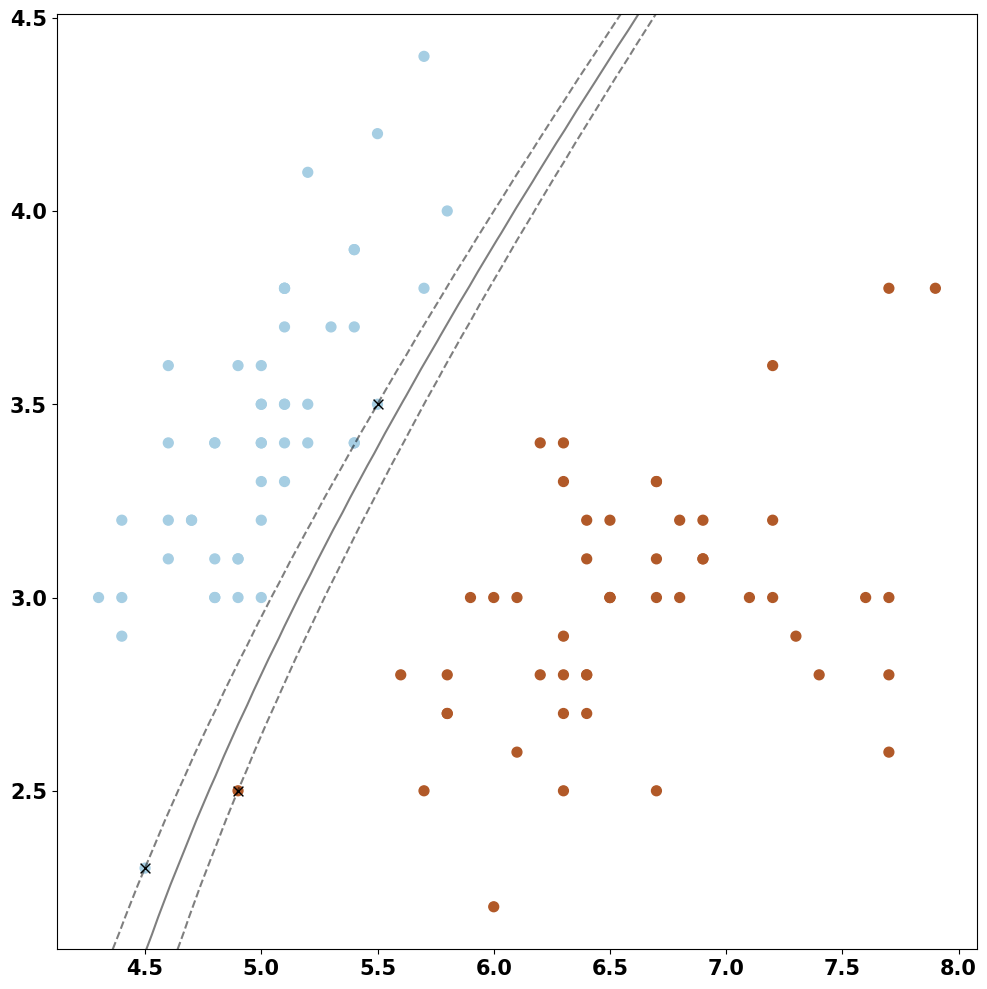

In [36]:
plt.figure(figsize=(10, 10))

# plot the point cloud
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)

# get frame limits
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# visualize support vectors with a cross
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
           s=50, linewidth=1, marker='x', color='k')

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
           alpha=0.5, linestyles=['--', '-', '--'])

# format the plot
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

__Question :__ Où sont situés les vecteurs de support ?

__Réponse :__ ###

De part et d'autre du séparateur 

Quelle est la performance de ce modèle ?

In [37]:
performance_predicteur = clf.score(X,y)
print("Performance du predicteur : ", performance_predicteur)
report = classification_report(y, clf.predict(X))
print(report)

Performance du predicteur :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



La performance est moins bonne que le premier exemple. Essayons d'utiliser un noyau pour avoir une séparation plus complexe et mieux coller aux données !

### SVM à noyau non linéaire

Nous allons utiliser un noyau RBF gaussien, pour plusieurs valeurs du paramètre gamma. En classe nous avons donné la formule 

$k(x, x') = \frac{1}{\sqrt{2 \pi}} \exp\frac{||x - x'||^2}{2 \sigma^2}$ pour le noyau gaussien. 

__Question :__ À quoi correspond le paramètre gamma ?

__Réponse :__

In [34]:
# genere plusieur valeurs de gamma (de 1 à 50)
import numpy as np

gamma_range = np.logspace(-9, 3, 50)

#tester le modèle pour chaque valeur de gamma
for param in gamma_range:
    clf = svm.SVC(kernel='rbf', gamma=param)
    clf.fit(X, y)
    print("gamma: %.2f" % param, "score: %.2f" % clf.score(X, y))

gamma: 0.00 score: 0.98
gamma: 0.00 score: 0.98
gamma: 0.00 score: 0.85
gamma: 0.00 score: 0.68
gamma: 0.00 score: 0.93
gamma: 0.00 score: 0.92
gamma: 0.00 score: 0.92
gamma: 0.00 score: 0.92
gamma: 0.00 score: 0.92
gamma: 0.00 score: 0.92
gamma: 0.00 score: 0.92
gamma: 0.00 score: 0.92
gamma: 0.00 score: 0.92
gamma: 0.00 score: 0.92
gamma: 0.00 score: 0.92
gamma: 0.00 score: 0.92
gamma: 0.00 score: 0.92
gamma: 0.00 score: 0.92
gamma: 0.00 score: 0.92
gamma: 0.00 score: 0.92
gamma: 0.00 score: 0.92
gamma: 0.00 score: 0.92
gamma: 0.00 score: 0.92
gamma: 0.00 score: 0.92
gamma: 0.00 score: 0.92
gamma: 0.00 score: 0.92
gamma: 0.00 score: 0.92
gamma: 0.00 score: 0.92
gamma: 0.01 score: 0.96
gamma: 0.01 score: 0.98
gamma: 0.02 score: 0.99
gamma: 0.04 score: 0.99
gamma: 0.07 score: 0.99
gamma: 0.12 score: 0.99
gamma: 0.21 score: 0.99
gamma: 0.37 score: 0.99
gamma: 0.66 score: 0.99
gamma: 1.15 score: 0.99
gamma: 2.02 score: 0.99
gamma: 3.56 score: 1.00
gamma: 6.25 score: 1.00
gamma: 10.99 sco

__Question :__ Affichez maintenant la frontière de séparation pour le dernier de ces classifieurs, commenter le résultat.

__Réponse :__

Est-ce que ce modèle se __généralise__ bien, autrement dit, sera-t-il capable de faire de bonnes prédictions sur de nouvelles données que nous n'avons pas utilisées pour le construire ? 

Pour le savoir, nous allons séparer les données en un __jeu d'entraînement__ et un __jeu de test__. Nous allons entraîner nos SVMs sur le jeu d'entraînement seulement, et mesurer leur performance sur le jeu de test. Le jeu de test, étant inconnu au moment de l'entraînement, fait figure de nouvelles données. Pour cela nous allons utiliser la fonction `train_test_split` de scikit-learn, décrite [ici](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = ###

#Initialisation des listes pour stocker les scores :
acc_train, acc_test = list(), list()

#Boucle sur les valeurs de gamma_range
for param in gamma_range:
    clf = ###
    clf.fit(X_train, y_train)
    # Le score (précision, par exemple) du modèle est calculé sur les données d’entraînement et ajouté à la liste acc_train
    ### CODE ###
    # Le score du modèle est calculé sur les données de test et ajouté à la liste acc_test.
    ### CODE ###

In [ ]:
plt.figure(figsize=(10, 5))

# plot train and test scores for different gamma values
plt.plot(gamma_range, acc_train, label='train set', lw=4)
plt.plot(gamma_range, acc_test, label='test set', lw=4)

# add a legend
plt.legend(loc='best', fontsize=12)

# format the plot
plt.xlabel("Gamma", fontweight="bold", fontsize=20)
plt.ylabel("Performance", fontweight="bold", fontsize=20)
plt.xticks(fontweight="bold", fontsize=15)
plt.yticks(fontweight="bold", fontsize=15)
plt.tight_layout()

plt.show()

__Question :__ Observez-vous un effet de surapprentissage ? Où ? 

__Réponse :__  

Le graphique ci-dessus nous donne envie de prendre pour le paramètre gamma une valeur proche de 10 ou 20. Mais attention ! Si nous prenons le paramètre qui marche le mieux sur le dataset de test, nous risquons aussi de surapprendre : nous aurons alors utilisé le jeu de test pour choisir le meilleur modèle, autrement dit, nous aurons touché aux données soi-disant inconnuees lors de l'apprentissage...

Pour éviter cela, nous allons faire une __validation croisée__ (_cross-validation_) sur le jeu d'entraînement.

Nous allons pour cela utiliser la classe [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) du module model_selection de scikit-learn.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir les paramètres à tester
parameters = {'kernel':####, 
              'C':####}

# Initialiser un classifieur SVM
svc = svm.SVC()

# Initialiser un gridsearch
clf = ####

# Faire tourner la validation croisée sur le jeu d'entraînement
clf.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(10, 5))

# format results from gridsearch
scores = clf.cv_results_['mean_test_score'].reshape(len(parameters['kernel']), len(parameters['C']))

# plot performance scores
plt.imshow(scores, interpolation='none')
#plt.imshow(scores, interpolation='none', cmap="RdBu_r", vmin=0, vmax=1)

# add a colorbar
plt.colorbar()

# format the plot
plt.title("Score", fontweight="bold", fontsize=20)
plt.xlabel("C", fontweight="bold", fontsize=18)
plt.ylabel("Noyau", fontweight="bold", fontsize=18)
plt.ylim((-0.5, 1.5))
plt.xticks(np.arange(len(parameters['C'])), parameters['C'], fontsize=15)
plt.yticks(np.arange(len(parameters['kernel'])), parameters['kernel'], rotation=90, fontsize=15)
plt.tight_layout()

plt.show()

__Question :__ Quel est le rôle du paramètre C ? Qu'observez-vous quand C est grand ? 

__Réponse :__